In [1]:
import pandas as pd
from constants import dataset_path, dataset_EDA_path
  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(dataset_path)

### Descriptive analysis 

In [3]:
initial_count_row = df.shape[0]
initial_count_row

11744

In [4]:
df.tail(2)

,repo,language,author,title,body,created_at,closed_at,authors_in_comments,reviews,labels,...,commits,diff_file_url,changes,title_count,body_count,labels_count,commits_count,latency,pull_requests_neighbours_latency,pull_requests_neighbours_count
11742,react,js,bvaughn,Add noop useDebugValue hook to partial/server ...,NaN,2019-01-15 16:50:08,2019-01-15 19:00:04,"['gaearon', 'bvaughn']",['APPROVED'],['CLA Signed'],...,['Add noop useDebugValue hook to partial/serve...,https://github.com/facebook/react/pull/14597.diff,16,54,0,1,1,130,1309,7
11743,react,js,bvaughn,useDebugValue should throw if used in a class ...,NaN,2019-01-15 21:19:24,2019-01-15 21:49:40,[],"['APPROVED', 'APPROVED']",['CLA Signed'],...,['useDebugValue should throw if used in a clas...,https://github.com/facebook/react/pull/14601.diff,20,55,0,1,1,30,1309,7


In [5]:
df.describe()

,additions,deletions,changed_files,changes,title_count,body_count,labels_count,commits_count,latency,pull_requests_neighbours_latency,pull_requests_neighbours_count
count,11744.000000,11744.000000,11744.000000,11744.000000,11744.000000,11744.000000,11744.000000,11744.000000,11744.000000,11744.000000,11744.000000
mean,692.327401,483.606182,16.582595,1175.933583,41.431029,612.420385,1.268903,2.677452,507.640072,9294.655399,22.118869
std,8812.626004,6481.933598,142.525719,14683.322896,16.028566,2843.160253,0.942655,5.582910,471.627438,6333.401389,15.582526
min,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,4.000000,30.000000,73.000000,1.000000,1.000000,69.000000,4701.000000,10.000000
50%,11.000000,3.000000,2.000000,19.000000,41.000000,223.000000,1.000000,1.000000,343.000000,8394.500000,20.000000
75%,57.000000,20.000000,4.000000,85.000000,51.000000,536.000000,2.000000,2.000000,931.000000,12654.250000,31.000000
max,341495.000000,279337.000000,3000.000000,557340.000000,146.000000,64124.000000,8.000000,50.000000,1440.000000,47312.000000,132.000000


### Remove outliers

These constrain aim for filtering those PRs which have been merged in an active repository and present a nonextreme diff changes

In [6]:
max_latency = 7 * 24 * 60 #7 days
min_latency = 1 #1 minute
max_changes = 2000
min_changes = 1
max_changed_files = 50
min_changed_files = 1
min_pull_requests_neighbours_count = 5

#### Set min and max allowed `latency`

0.9964237057220708

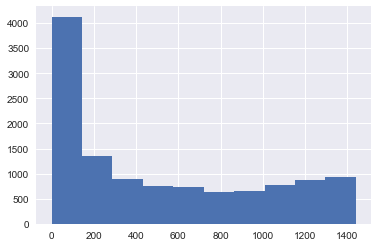

In [7]:
df.latency.hist()
np.logical_and(df.latency >= min_latency, df.latency <= max_latency).sum() / df.shape[0]

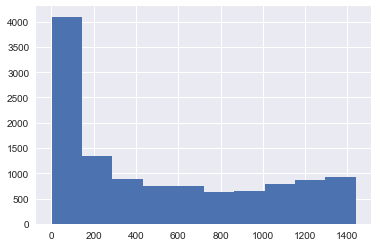

In [8]:
df = df[np.logical_and(df.latency >= min_latency, df.latency <= max_latency)]
df.latency.hist();

#### Set min and max allowed `changes`

0.9582122714065971

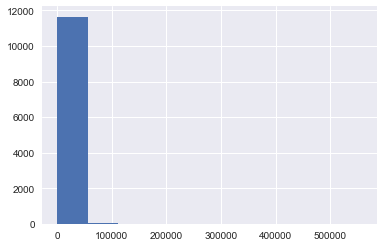

In [9]:
df.changes.hist()
np.logical_and(df.changes >= min_changes, df.changes <= max_changes).sum() / df.shape[0]

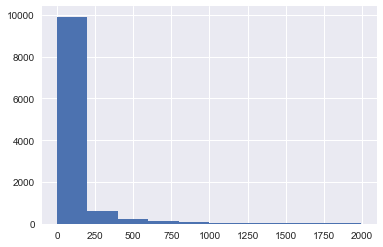

In [10]:
df = df[np.logical_and(df.changes >= min_changes, df.changes <= max_changes)]
df.changes.hist();

#### Set min and max allowed `changed_files`

0.9912601444751628

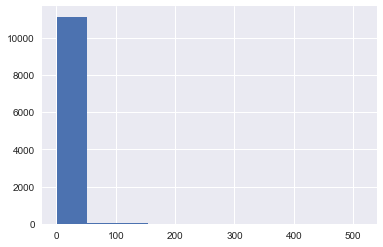

In [11]:
df.changed_files.hist()
np.logical_and(df.changed_files >= min_changed_files, df.changed_files <= max_changed_files).sum() / df.shape[0]

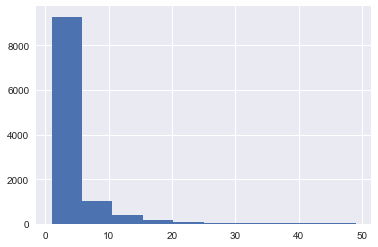

In [12]:
df = df[np.logical_and(df.changed_files >= min_changed_files, df.changed_files <= max_changed_files)]
df.changed_files.hist();

#### Set min allowed `pull_requests_neighbours_count`

0.9280251911830859

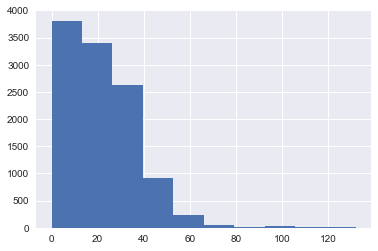

In [13]:
df.pull_requests_neighbours_count.hist()
(df.pull_requests_neighbours_count >= min_pull_requests_neighbours_count).sum() / df.shape[0]

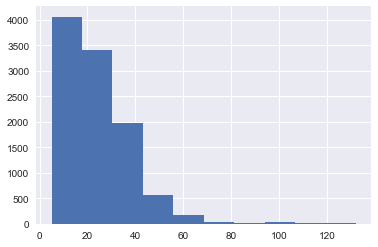

In [14]:
df = df[df.pull_requests_neighbours_count >= min_pull_requests_neighbours_count]
df.pull_requests_neighbours_count.hist();

In [15]:
df.shape[0] / initial_count_row

0.8783208446866485

In [16]:
df.describe()

,additions,deletions,changed_files,changes,title_count,body_count,labels_count,commits_count,latency,pull_requests_neighbours_latency,pull_requests_neighbours_count
count,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000
mean,61.074939,32.958216,3.685894,94.033156,41.963451,425.313912,1.233446,2.196219,499.698206,9974.096171,23.852545
std,152.354485,107.010937,5.394791,222.178779,15.969433,1371.715284,0.875067,3.285002,469.321735,6128.928393,15.045309
min,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,110.000000,5.000000
25%,2.000000,1.000000,1.000000,4.000000,31.000000,73.000000,1.000000,1.000000,66.000000,5624.500000,12.000000
50%,10.000000,3.000000,2.000000,18.000000,41.000000,217.000000,1.000000,1.000000,331.000000,8975.000000,21.000000
75%,50.000000,17.000000,4.000000,75.000000,51.000000,519.000000,2.000000,2.000000,917.000000,13175.000000,32.000000
max,1953.000000,1769.000000,49.000000,1996.000000,146.000000,64124.000000,8.000000,50.000000,1440.000000,47312.000000,132.000000


### Synthesize variables

In [17]:
df['changes_commit_ratio'] = df.commits_count / df.changes
df['add_delete_diff'] = df.additions - df.deletions
df.head(2)

,repo,language,author,title,body,created_at,closed_at,authors_in_comments,reviews,labels,...,changes,title_count,body_count,labels_count,commits_count,latency,pull_requests_neighbours_latency,pull_requests_neighbours_count,changes_commit_ratio,add_delete_diff
6,bootstrap,js,weslly,fixed background-color for disabled links in p...,'none' isn't a valid value for background-colo...,2011-08-26 16:31:56,2011-08-26 16:53:23,['mdo'],[],[],...,2,55,121,0,1,21,753,6,0.500000,0
7,bootstrap,js,pthrasher,Fix for popover issue from #136,This is a fix for the popover issue in fluid l...,2011-09-02 15:13:10,2011-09-02 16:51:32,"['mdo', 'pthrasher', 'mdo', 'pthrasher', 'mdo']",[],[],...,14,31,289,0,4,98,774,7,0.285714,0


### Comparative analysis

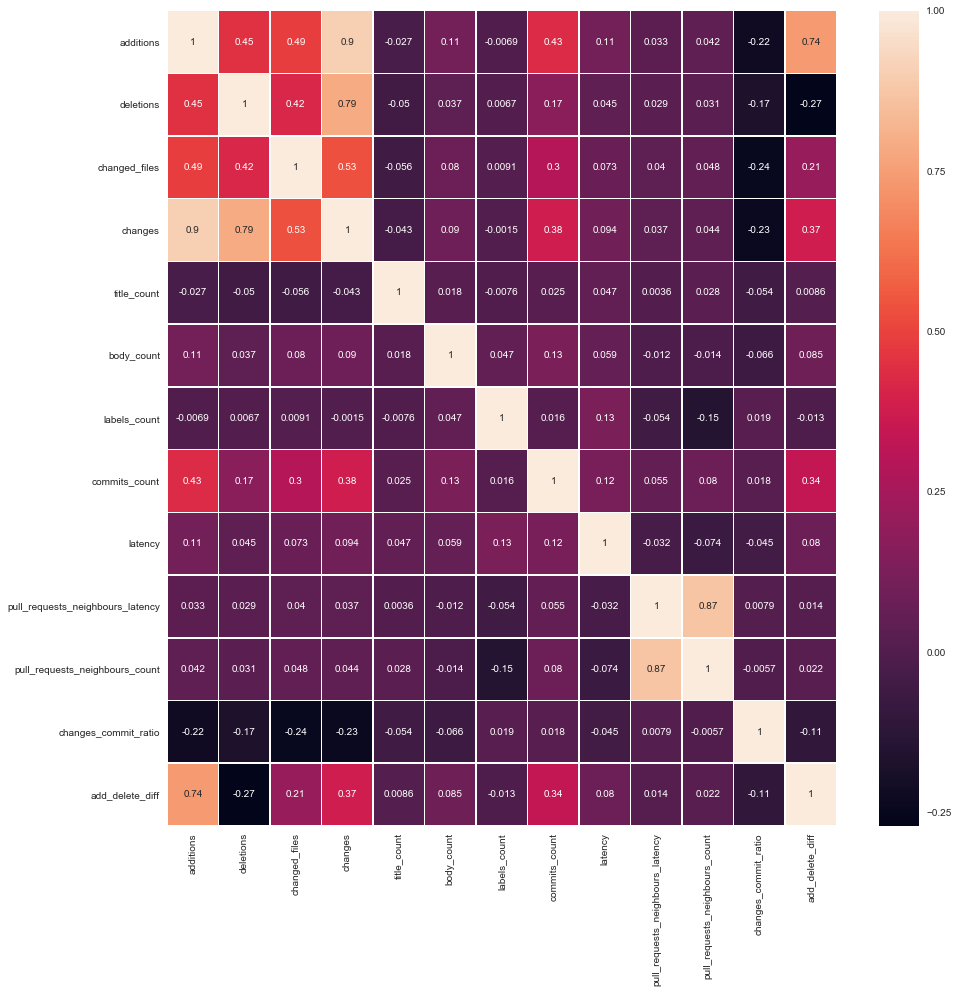

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.5, ax=ax)

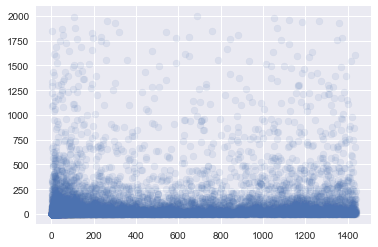

In [19]:
plt.scatter(x = df.latency, y = df.changes, alpha=0.1)
plt.show()

In [20]:
df.to_csv(dataset_EDA_path, index=False)